IMPORTAÇOES

In [34]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

CONECTANDO

In [5]:
conn = sqlite3.connect('northwind.db')

CHECANDO NOMES DE TABELAS E COLUNAS

In [7]:
query_tabelas = 'SELECT name FROM sqlite_master WHERE type="table"'
tabelas = pd.read_sql_query(query_tabelas, conn)

print(tabelas)

                    name
0             Categories
1        sqlite_sequence
2   CustomerCustomerDemo
3   CustomerDemographics
4              Customers
5              Employees
6    EmployeeTerritories
7          Order Details
8                 Orders
9               Products
10               Regions
11              Shippers
12             Suppliers
13           Territories


TABELAS PARA REQUISITAR
Customers
Orders
Order Details
Products
Categories
Employees

In [18]:
tabela_alvo = 'Customers'
query_colunas = f'PRAGMA table_info({tabela_alvo})'
colunas = pd.read_sql_query(query_colunas, conn)

print(f'\nEstrutura da tabela {tabela_alvo}: ')
print(colunas[['name', 'type', 'notnull', 'pk']])

tabela_alvo = 'Orders'
query_colunas = f'PRAGMA table_info({tabela_alvo})'
colunas = pd.read_sql_query(query_colunas, conn)

print(f'\nEstrutura da tabela {tabela_alvo}: ')
print(colunas[['name', 'type', 'notnull', 'pk']])



Estrutura da tabela Customers: 
            name  type  notnull  pk
0     CustomerID  TEXT        0   1
1    CompanyName  TEXT        0   0
2    ContactName  TEXT        0   0
3   ContactTitle  TEXT        0   0
4        Address  TEXT        0   0
5           City  TEXT        0   0
6         Region  TEXT        0   0
7     PostalCode  TEXT        0   0
8        Country  TEXT        0   0
9          Phone  TEXT        0   0
10           Fax  TEXT        0   0

Estrutura da tabela Orders: 
              name      type  notnull  pk
0          OrderID   INTEGER        1   1
1       CustomerID      TEXT        0   0
2       EmployeeID   INTEGER        0   0
3        OrderDate  DATETIME        0   0
4     RequiredDate  DATETIME        0   0
5      ShippedDate  DATETIME        0   0
6          ShipVia   INTEGER        0   0
7          Freight   NUMERIC        0   0
8         ShipName      TEXT        0   0
9      ShipAddress      TEXT        0   0
10        ShipCity      TEXT        0   0
1

In [16]:
tabela_alvo = '"Order Details"'
query_colunas = f'PRAGMA table_info({tabela_alvo})'
colunas = pd.read_sql_query(query_colunas, conn)

print(f'\nEstrutura da tabela {tabela_alvo}: ')
print(colunas[['name', 'type', 'notnull', 'pk']])

tabela_alvo = 'Products'
query_colunas = f'PRAGMA table_info({tabela_alvo})'
colunas = pd.read_sql_query(query_colunas, conn)
print(f'\nEstrutura da tabela {tabela_alvo}: ')
print(colunas[['name', 'type', 'notnull', 'pk']])


Estrutura da tabela "Order Details": 
        name     type  notnull  pk
0    OrderID  INTEGER        1   1
1  ProductID  INTEGER        1   2
2  UnitPrice  NUMERIC        1   0
3   Quantity  INTEGER        1   0
4   Discount     REAL        1   0

Estrutura da tabela Products: 
              name     type  notnull  pk
0        ProductID  INTEGER        1   1
1      ProductName     TEXT        1   0
2       SupplierID  INTEGER        0   0
3       CategoryID  INTEGER        0   0
4  QuantityPerUnit     TEXT        0   0
5        UnitPrice  NUMERIC        0   0
6     UnitsInStock  INTEGER        0   0
7     UnitsOnOrder  INTEGER        0   0
8     ReorderLevel  INTEGER        0   0
9     Discontinued     TEXT        1   0


In [17]:
tabela_alvo = 'Categories'
query_colunas = f'PRAGMA table_info({tabela_alvo})'
colunas = pd.read_sql_query(query_colunas, conn)

print(f'\nEstrutura da tabela {tabela_alvo}: ')
print(colunas[['name', 'type', 'notnull', 'pk']])

tabela_alvo = 'Employees'
query_colunas = f'PRAGMA table_info({tabela_alvo})'
colunas = pd.read_sql_query(query_colunas, conn)

print(f'\nEstrutura da tabela {tabela_alvo}: ')
print(colunas[['name', 'type', 'notnull', 'pk']])


Estrutura da tabela Categories: 
           name     type  notnull  pk
0    CategoryID  INTEGER        0   1
1  CategoryName     TEXT        0   0
2   Description     TEXT        0   0
3       Picture     BLOB        0   0

Estrutura da tabela Employees: 
               name     type  notnull  pk
0        EmployeeID  INTEGER        0   1
1          LastName     TEXT        0   0
2         FirstName     TEXT        0   0
3             Title     TEXT        0   0
4   TitleOfCourtesy     TEXT        0   0
5         BirthDate     DATE        0   0
6          HireDate     DATE        0   0
7           Address     TEXT        0   0
8              City     TEXT        0   0
9            Region     TEXT        0   0
10       PostalCode     TEXT        0   0
11          Country     TEXT        0   0
12        HomePhone     TEXT        0   0
13        Extension     TEXT        0   0
14            Photo     BLOB        0   0
15            Notes     TEXT        0   0
16        ReportsTo  INTEGER 

CARREGANDO

In [26]:
query_analise = '''
SELECT
o.OrderID,
o.CustomerID,
o.EmployeeID,
o.OrderDate,
o.ShippedDate,
o.ShipCountry,
c.CompanyName,
c.City,
c.Country,
od.ProductID,
od.UnitPrice AS preco_venda,
od.Quantity,
od.Discount,
p.ProductName,
p.CategoryID,
p.UnitPrice AS preco_lista,
ctg.CategoryName,
e.LastName,
e.City AS city_emplyee,
e.Country As country_employee
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
JOIN "Order Details" od ON o.OrderID = od.OrderID
JOIN Products p ON od.ProductID = p.ProductID
JOIN Categories ctg ON p.CategoryID = ctg.CategoryID
Join Employees e ON o.EmployeeID = e.EmployeeID
'''

df_nw = pd.read_sql_query(query_analise, conn)
df_nw.head()

,OrderID,CustomerID,EmployeeID,OrderDate,ShippedDate,ShipCountry,CompanyName,City,Country,ProductID,preco_venda,Quantity,Discount,ProductName,CategoryID,preco_lista,CategoryName,LastName,city_emplyee,country_employee
0,10248,VINET,5,2016-07-04,2016-07-16,France,Vins et alcools Chevalier,Reims,France,11,14.0,12,0.0,Queso Cabrales,4,21.00,Dairy Products,Buchanan,London,UK
1,10248,VINET,5,2016-07-04,2016-07-16,France,Vins et alcools Chevalier,Reims,France,42,9.8,10,0.0,Singaporean Hokkien Fried Mee,5,14.00,Grains/Cereals,Buchanan,London,UK
2,10248,VINET,5,2016-07-04,2016-07-16,France,Vins et alcools Chevalier,Reims,France,72,34.8,5,0.0,Mozzarella di Giovanni,4,34.80,Dairy Products,Buchanan,London,UK
3,10249,TOMSP,6,2016-07-05,2016-07-10,Germany,Toms Spezialitäten,Münster,Germany,14,18.6,9,0.0,Tofu,7,23.25,Produce,Suyama,London,UK
4,10249,TOMSP,6,2016-07-05,2016-07-10,Germany,Toms Spezialitäten,Münster,Germany,51,42.4,40,0.0,Manjimup Dried Apples,7,53.00,Produce,Suyama,London,UK


TRATANDO

In [38]:
df_nw['receita_item'] = df_nw['preco_venda'] * df_nw['Quantity'] * (1 - df_nw['Discount'])

In [39]:
df_nw['OrderDate'] = pd.to_datetime(df_nw['OrderDate'], format='mixed')
df_nw['ShippedDate'] = pd.to_datetime(df_nw['ShippedDate'], format='mixed')

print(df_nw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609283 entries, 0 to 609282
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   OrderID           609283 non-null  int64         
 1   CustomerID        609283 non-null  object        
 2   EmployeeID        609283 non-null  int64         
 3   OrderDate         609283 non-null  datetime64[ns]
 4   ShippedDate       609210 non-null  datetime64[ns]
 5   ShipCountry       609283 non-null  object        
 6   CompanyName       609283 non-null  object        
 7   City              596000 non-null  object        
 8   Country           596000 non-null  object        
 9   ProductID         609283 non-null  int64         
 10  preco_venda       609283 non-null  float64       
 11  Quantity          609283 non-null  int64         
 12  Discount          609283 non-null  float64       
 13  ProductName       609283 non-null  object        
 14  Cate

In [40]:
receita_produto = df_nw.groupby('CategoryName')['receita_item'].sum().sort_values(ascending=False).reset_index()

VISUALIZAÇAO RECEITA

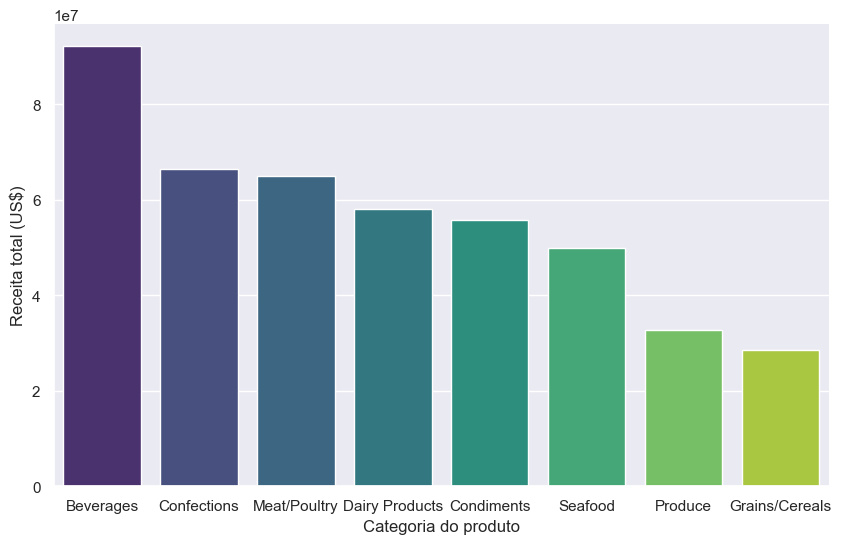

In [44]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x='CategoryName', y='receita_item', data=receita_produto, hue='CategoryName', palette='viridis', legend=False)
sns.despine()
plt.xlabel('Categoria do produto')
plt.ylabel('Receita total (US$)')
plt.show()

VISUALIZAÇAO TEMPO DE ENVIO

In [47]:
df_nw['dias_para_envio'] = (df_nw['ShippedDate'] - df_nw['OrderDate']).dt.days

In [49]:
envio = df_nw.groupby('ShipCountry')['dias_para_envio'].mean().sort_values(ascending=False).reset_index()

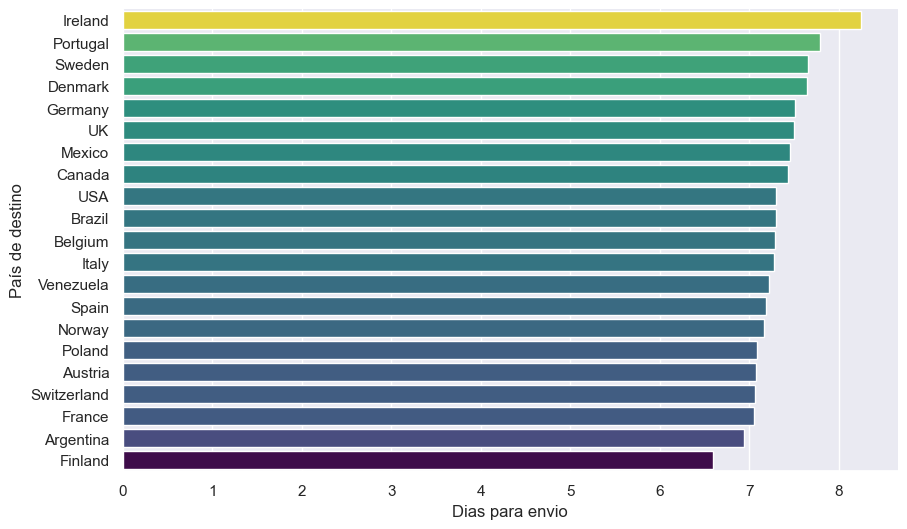

In [53]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x='dias_para_envio', y='ShipCountry', data=envio, hue='dias_para_envio', palette='viridis', legend=False)
sns.despine()
plt.xlabel('Dias para envio')
plt.ylabel('País de destino')
plt.show()

VISUALIZAÇAO PAISES QUE MAIS COMPRAM

In [54]:
paises_que_mais_compram = df_nw.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index()

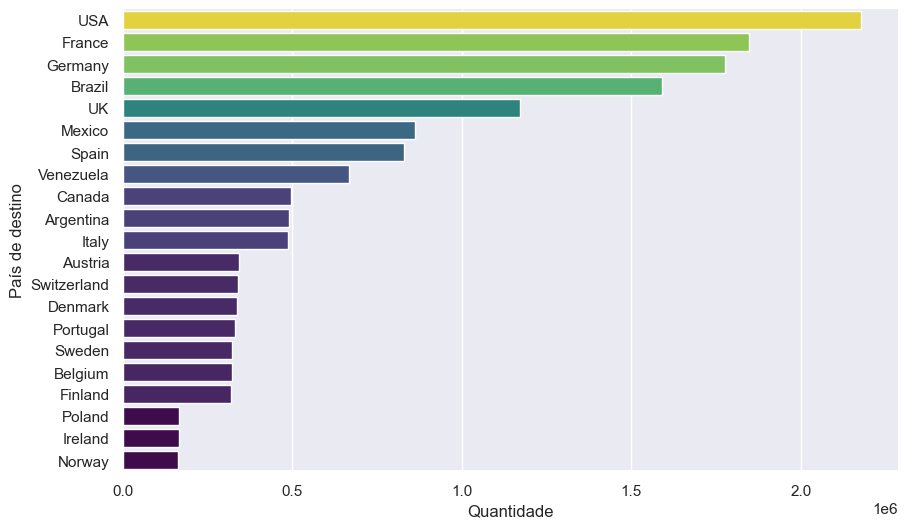

In [56]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x='Quantity', y='Country', data=paises_que_mais_compram, hue='Quantity', palette='viridis', legend=False)
sns.despine()
plt.xlabel('Quantidade')
plt.ylabel('País de destino')
plt.show()

VISUALIZAÇAO TOP 10 CLIENTES

In [67]:
top_clientes = df_nw.groupby(['CompanyName', 'Country']).agg({
    'receita_item':'sum',
    'OrderID':'nunique',
    'Quantity':'sum'
}).reset_index()

In [68]:
top_clientes = top_clientes.sort_values(by='Quantity', ascending=False)
top_clientes = top_clientes.head(10)

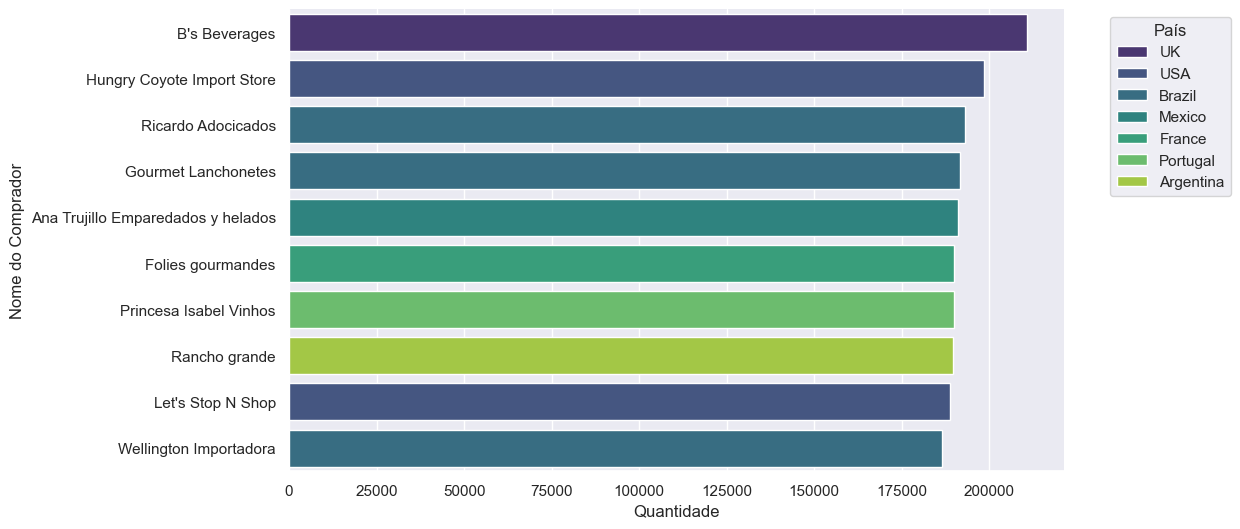

In [70]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x='Quantity', y='CompanyName', data=top_clientes, hue='Country', palette='viridis', dodge=False)
sns.despine()
plt.xlabel('Quantidade')
plt.ylabel('Nome do Comprador')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Conclusão da Análise: Northwind Trading
1. Dominância de Portfólio (Mix de Produtos)
O faturamento da empresa é tracionado pela categoria de Bebidas (Beverages) e Doces (Confections). Isso indica que a Northwind tem uma força de vendas muito grande em itens de alto giro (consumo rápido). Categorias como Grãos e Cereais estão na lanterna, o que sugere uma oportunidade de revisão de preços ou de marketing para esses setores.

2. Eficiência Logística vs. Volume
Identificamos um "gargalo de crescimento" importante:

Os Gigantes são Lentos: Os mercados líderes (USA, Brasil e Alemanha) sofrem com um Lead Time (tempo de envio) elevado, variando entre 7 e 8 dias.

Modelos de Eficiência: Países como Argentina e Finlândia são os "benchmarks" de logística, com entregas abaixo de 7 dias.

Insight: A empresa precisa estudar os processos de envio da Argentina/Finlândia para tentar replicá-los nos mercados de alto volume (USA/Brasil), onde a demora pode estar gerando insatisfação ou custos de estocagem.

3. Perfil dos Clientes VIP
O faturamento está bem distribuído geograficamente entre os grandes players:

O maior cliente em volume é a BS Beverages (UK), o que explica a relevância da categoria de bebidas no topo.

O Brasil aparece com força no Top 5 através da Ricardo Adocicados e Gourmet Lanchonetes, mostrando que o mercado brasileiro é estratégico para a retenção de grandes contas.

A presença da Ana Trujillo (México) no Top 5 reforça a importância da América Latina para a operação.